<a href="https://colab.research.google.com/github/DKMaCS/steel_defect_pred/blob/main/pre_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  
### 1) Some IVs are normal-ish, uniform-ish, bimodal, or skewed (transformations might be required)
### 2) Need to determine what to do about outliers (transformations may help)
### 3) Correlation heatmap identifies potential opportunity for dimensionality reduction (PCA)

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px

In [2]:
# mounting google drive folder for data and notebook storage
drive.mount('/content/drive/')
%cd /content/drive/My Drive/kaggle/steel_predict

Mounted at /content/drive/
/content/drive/My Drive/kaggle/steel_predict


In [3]:
# setting some display parameters
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows
pd.set_option('display.width', None)        # Display without line-wrapping

In [4]:
df = pd.read_csv('data/train.csv')

In [5]:
df.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,1459.350747,0.402674,0.596337,76.213122,0.352939,0.409309,0.574520,0.030609,0.614749,0.831652,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,145.568687,0.490449,0.490644,53.931960,0.318976,0.124143,0.259436,0.047302,0.222391,0.220966,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317500,0.375750,0.006600,0.451600,0.655200,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413500,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.656100,0.494600,0.818200,0.019100,0.785700,1.000000,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.927500,1.000000,0.665100,1.000000,1.000000,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(19219, 35)

In [7]:
df_for_hists = df.iloc[:,1:28]

### note: there are a number of skewed, bimodal, and uniform-ish IVs that could be candidates for transformations or feature engineering

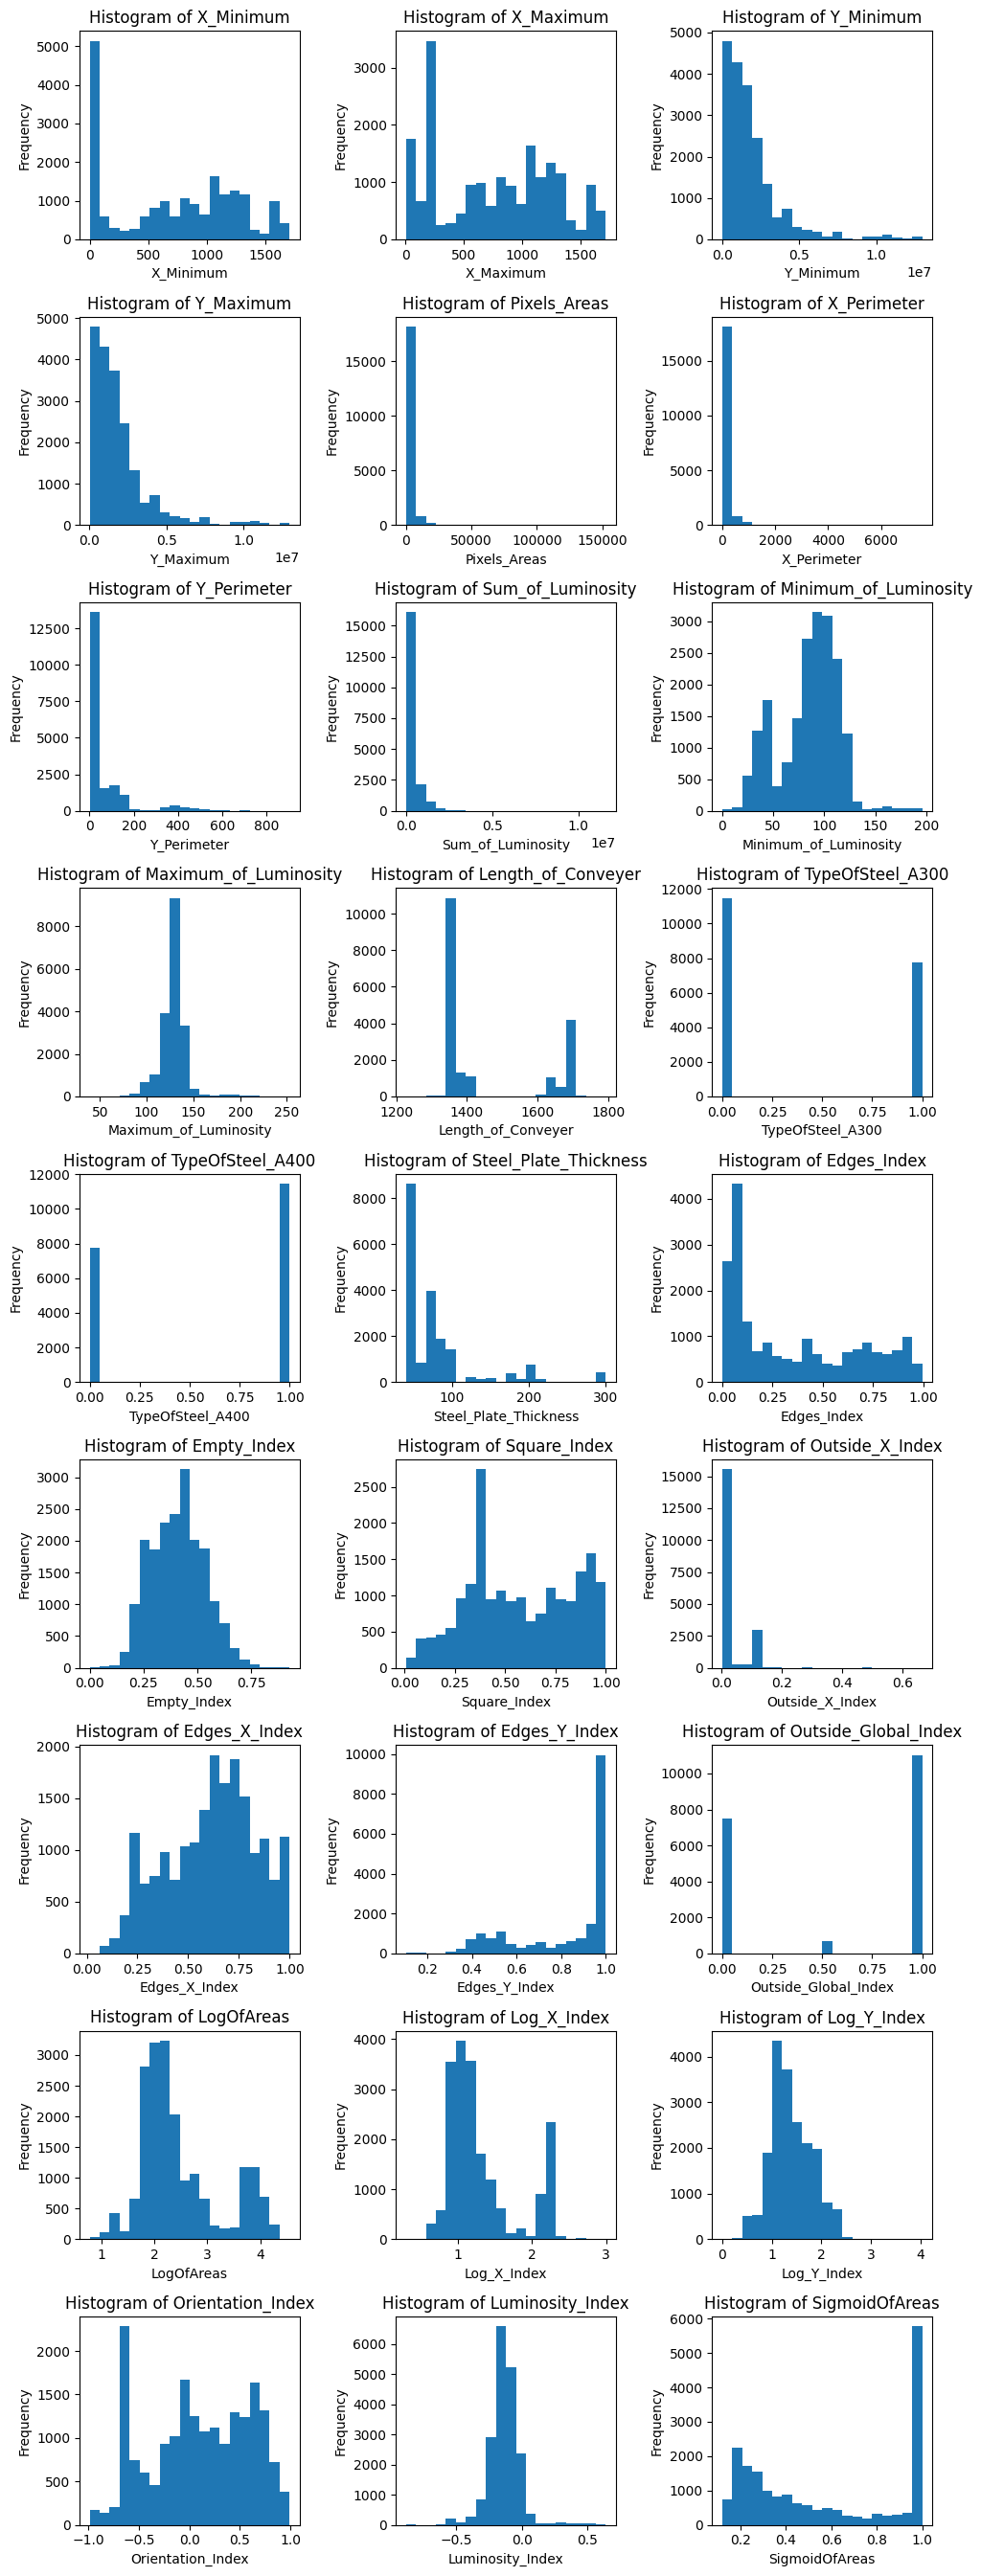

In [8]:
# Set up subplots in rows of 3
num_rows = len(df_for_hists.columns) // 3 + (len(df_for_hists.columns) % 3 > 0)  # Calculate the number of rows
fig, axes = plt.subplots(num_rows, 3, figsize=(10, 3 * num_rows))   # Adjust figsize as needed

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Create histograms for each variable in a subplot
for i, column in enumerate(df_for_hists.columns):
    axes[i].hist(df_for_hists[column], bins=20)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots if any
for j in range(len(df_for_hists.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### boxplots below show some variables have a ton of outliers as they were provided

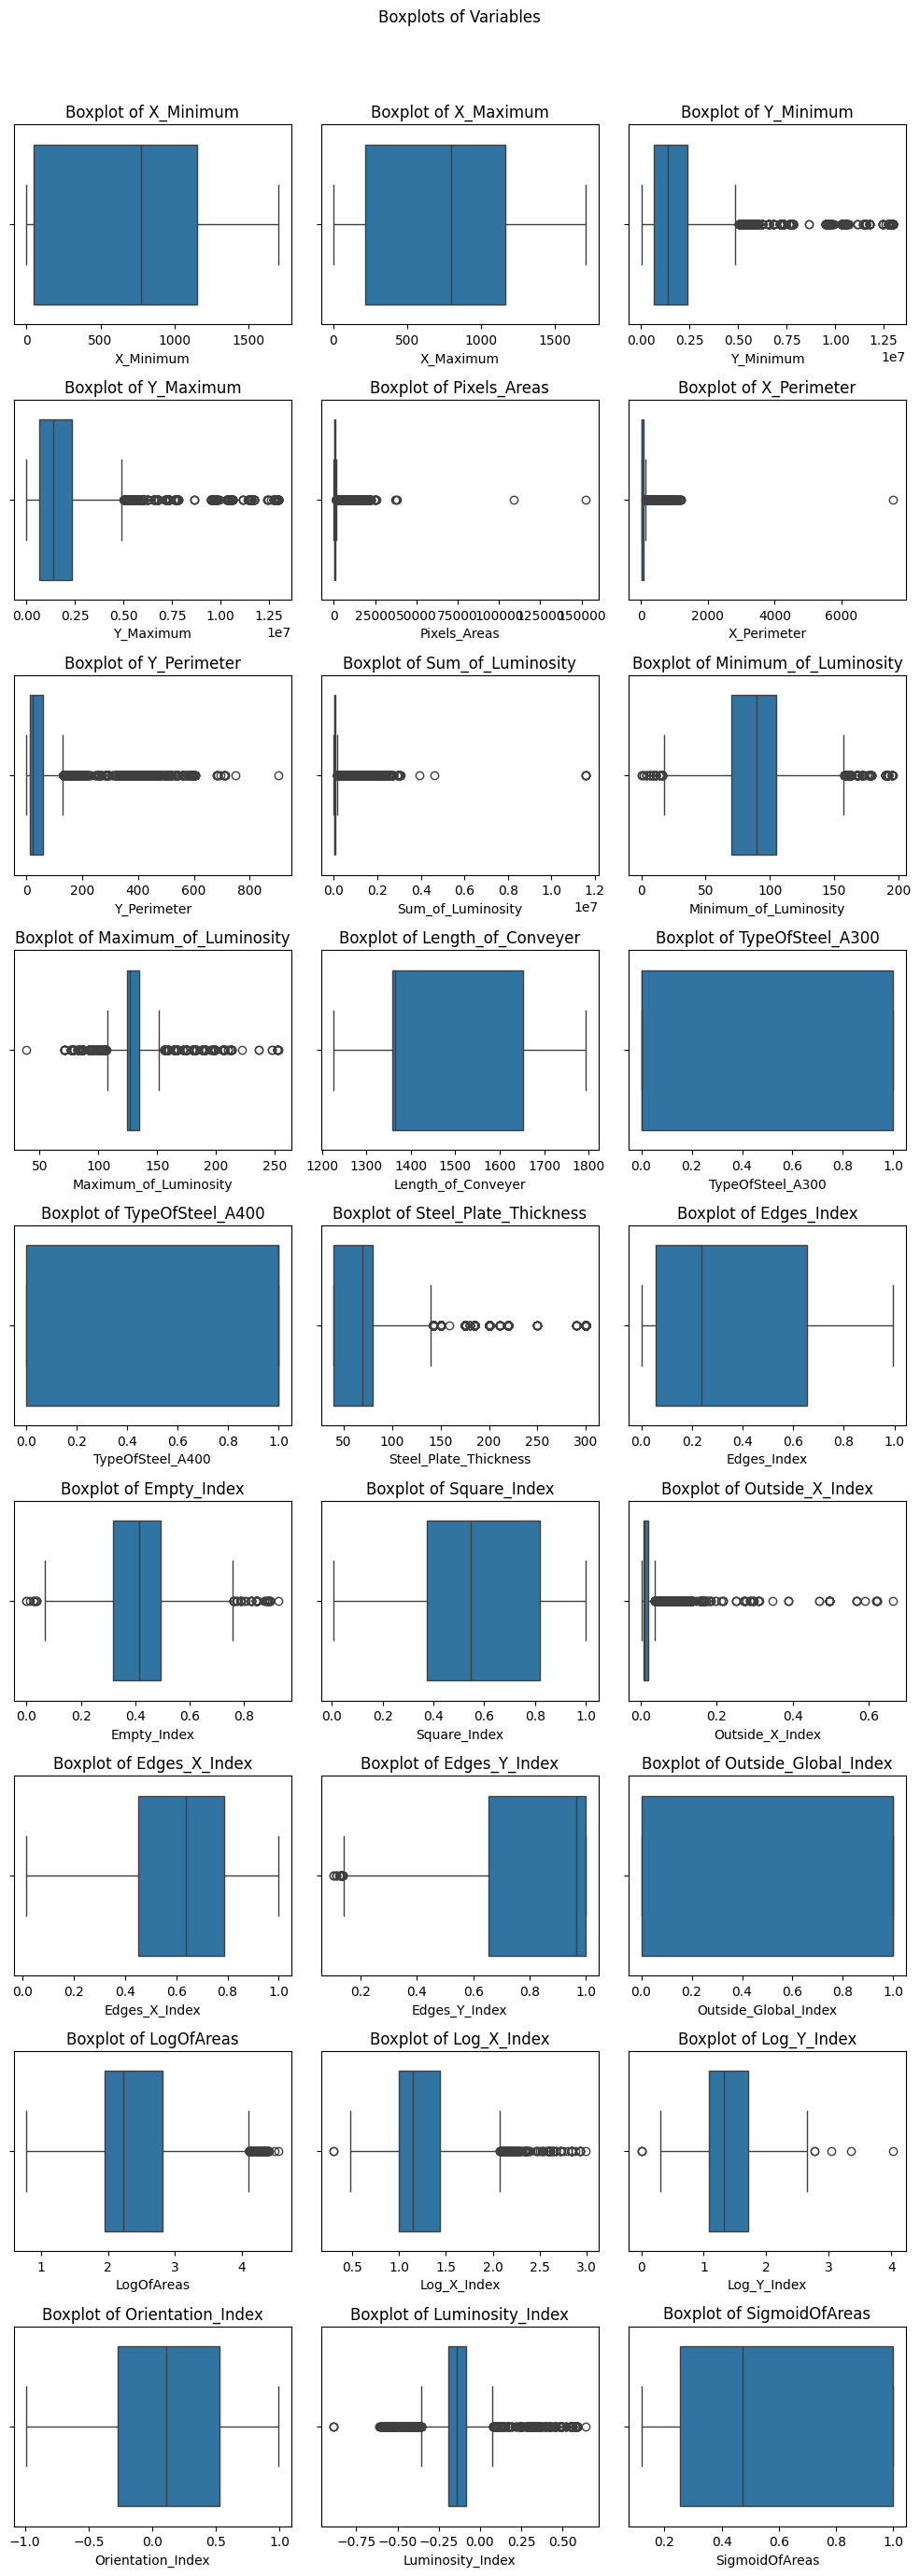

In [9]:
# Set up the matplotlib figure
num_columns = len(df_for_hists.columns)
num_rows = math.ceil(num_columns / 3)  # Assuming 3 columns per row, adjust as needed
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 3 * num_rows))
fig.suptitle('Boxplots of Variables', y=1.02)  # Adding a title

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Create boxplots for each variable in a subplot
for i, column in enumerate(df_for_hists.columns):
    sns.boxplot(x=df_for_hists[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Hide any empty subplots if necessary
for j in range(num_columns, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Note: there are high correlations along the diagonal, PCA might be useful for dimensionality reduction

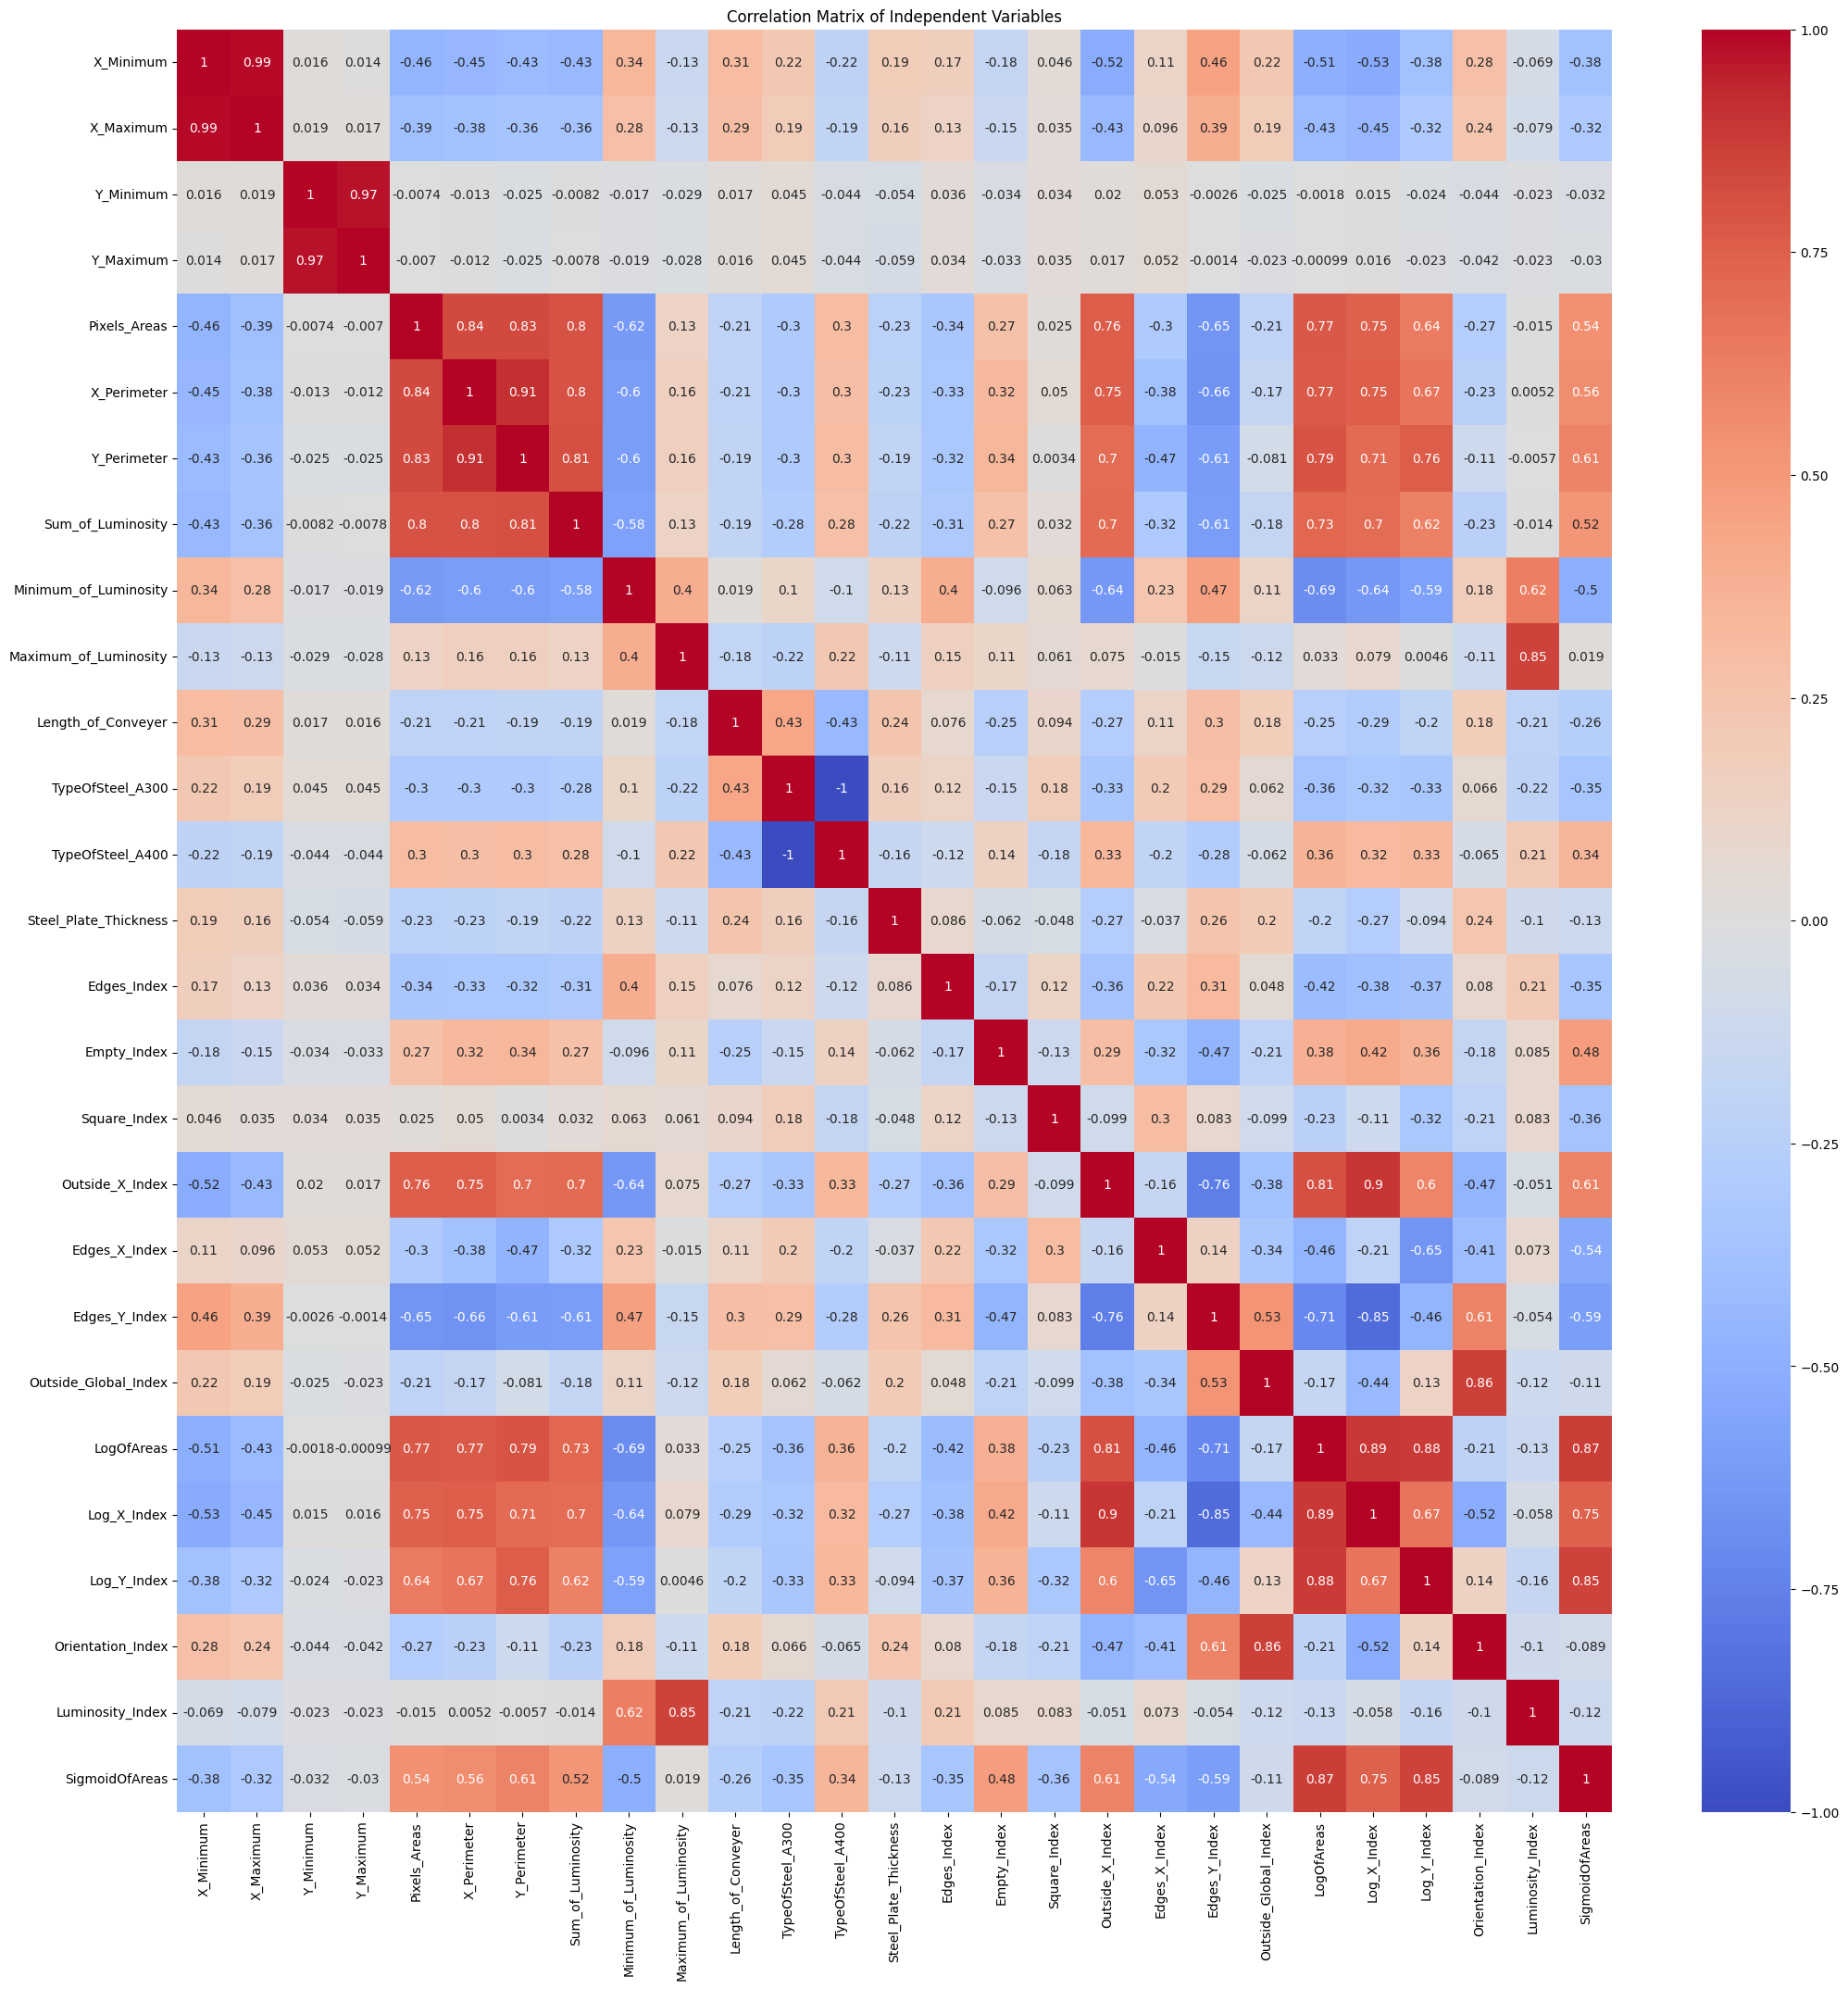

In [11]:
# Calculate the correlation matrix
correlation_matrix = df_for_hists.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Independent Variables')
plt.show()